
 # **Evaluating Water Potability** 
 ### By Group 21 Section 002


Clean water is an essential ingredient for a healthy human life. However, at least 2 billion people use a contaminated drinking water source, and approximately 297,000 children less than five years old die globally due to the pathogens present in water  (United Nations, n.d.). Particularly, water quality in Nigeria has been affecting the health of children. The United Nations (UN) and World Health Organization (WHO) recognize that safe and readily available water and better management of water resources can contribute greatly to poverty reduction in third world countries.
Currently, 30 UN entities have successfully developed partnerships with 40 international organizations to accomplish this goal  (SDG 6 Global Acceleration Framework, n.d.). 

Dr. Doe has been the head of WHO since 2017 and he has had the chance to monitor the health of several children suffering from waterborne diseases in Nigeria. Recently, Dr. Doe, along with his team of health associates have started their journey to explore the causes of unsafe drinking water in Nigeria, where they aim to explore the following question: **How can the chemical composition of water help scientists predict water potability in Nigeria?**

To answer this question, we have retrieved a dataset from kaggle.com which is called Water Potability Dataset. It contains water quality metrics such as pH value, hardness, solids (total dissolved solids), chloramines, sulfate, conductivity, total organic carbon, trihalomethanes, turbidity, and potability, which we can use to evaluate and predict the water potability for 3, 276 different water bodies.

## Preliminary Analysis 

The Water Potability Dataset is a tidy dataset as it meets all three characteristics of tidy data – each row is a single observation, each column is a single variable and each value is a single cell. However, there are some NA values in the Sulfate column that we will filter out so that it doesn’t cause us problems in our data analysis. 

### 1. Reading and Loading Data

In [1]:
# install required package
install.packages('corrplot')
install.packages('naniar')
install.packages("themis")
install.packages("GGally")
install.packages('tidyverse')

# import the libraries we need and set seed value 
library(tidyverse)
library(repr)
library(tidymodels)
library(corrplot)
library(gridExtra)
library(naniar)
library(themis)
library(GGally)


options(repr.matrix.max.rows = 10)
set.seed(1)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────

In [2]:
# read dataset from the web (our github repository)
# dataset source: https://www.kaggle.com/adityakadiwal/water-potability
url <- 'https://raw.githubusercontent.com/ricardoliu99/dsci100-group21/main/water_potability.csv'

# download dataset file using download.file 
download.file(url, 'water_potability.csv')

water <- read_csv('water_potability.csv') %>% mutate(Potability = as.factor(Potability))
water

Rows: 3276 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (10): ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.37978,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.18001,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.86864,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.43652,100.34167,4.628771,0
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
4.668102,193.6817,47580.99,7.166639,359.9486,526.4242,13.89442,66.68769,4.435821,1
7.808856,193.5532,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1
9.419510,175.7626,33155.58,7.350233,NA,432.0448,11.03907,69.84540,3.298875,1


### 2. Splitting the data into training and testing set 

We are choosing to split our dataset into 60% training data and 40% testing data. 

In [3]:
# split data into 60% training data and 40% test data
water_split <- initial_split(water, prop = 0.60, strata = Potability)
water_train <- training(water_split)
water_test <- testing(water_split)
water_train
water_test

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
NA,204.8905,20791.32,7.300212,368.5164,564.3087,10.379783,86.99097,2.963135,0
3.716080,129.4229,18630.06,6.635246,NA,592.8854,15.180013,56.32908,4.500656,0
8.099124,224.2363,19909.54,9.275884,NA,418.6062,16.868637,66.42009,3.055934,0
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
11.491011,94.81255,37188.83,9.263166,258.9306,439.8936,16.17276,41.55850,4.369264,1
4.668102,193.68174,47580.99,7.166639,359.9486,526.4242,13.89442,66.68769,4.435821,1
7.808856,193.55321,17329.80,8.061362,NA,392.4496,19.90323,NA,2.798243,1


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
7.496232,205.3450,28388.00,5.072558,NA,444.6454,13.22831,70.30021,4.777382,0
7.051786,211.0494,30980.60,10.094796,NA,315.1413,20.39702,56.65160,4.268429,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.893103,239.2695,20526.67,6.349561,341.2564,403.6176,18.96371,63.84632,4.390702,1
8.197353,203.1051,27701.79,6.472914,328.8868,444.6127,14.25088,62.90621,3.361833,1
8.372910,169.0871,14622.75,7.547984,NA,464.5256,11.08303,38.43515,4.906358,1


### 3. Analyzing the dataset 

Part of conducting a good data analysis is figuring out the length and metrics of our dataset. Here we count the number of rows per class, mean, max and min for each column, as well as the number of rows with at least one N/A. 

In [4]:
# count number of observations for each class in training data by grouping potability column
class_count <- water_train %>% 
    group_by(Potability) %>% 
    summarize(counts = n()) %>% 
    mutate(proportion = 100*counts/nrow(water_train))
class_count

# calculate mean of each predictor variable

predictor_means <- water_train %>%
    select(-Potability) %>% 
    map_df(mean, na.rm = TRUE)
predictor_means

# calculate max of each predictor variable
predictor_max <- water_train %>%
    select(-Potability) %>% 
    map_df(max, na.rm = TRUE)
predictor_max

# calculate min of each predictor variable
predictor_min <- water_train %>%
    select(-Potability) %>% 
    map_df(min, na.rm = TRUE)
predictor_min

# count number of observation with at least one missing value (NA)
missing_rows <- water_train %>%
    filter(is.na(ph) | is.na(Hardness) | is.na(Solids) | is.na(Chloramines) | 
           is.na(Sulfate) | is.na(Conductivity) | is.na(Organic_carbon) | 
           is.na(Trihalomethanes) | is.na(Turbidity)) %>% 
    nrow()

str_c('There are ', missing_rows, ' missing rows in the dataset.')

Potability,counts,proportion
<fct>,<int>,<dbl>
0,1199,60.98678
1,767,39.01322


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.08322,196.8623,22173.83,7.102138,334.0765,428.6891,14.31388,66.62283,3.965576


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,323.124,61227.2,13.127,476.5397,708.2264,28.3,120.0301,6.739


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,81.7109,320.9426,0.352,129,181.4838,2.2,0.738,1.45


[1] "There are 793 missing rows in the dataset."

The graph below represents the missing values per column in the dataset.

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


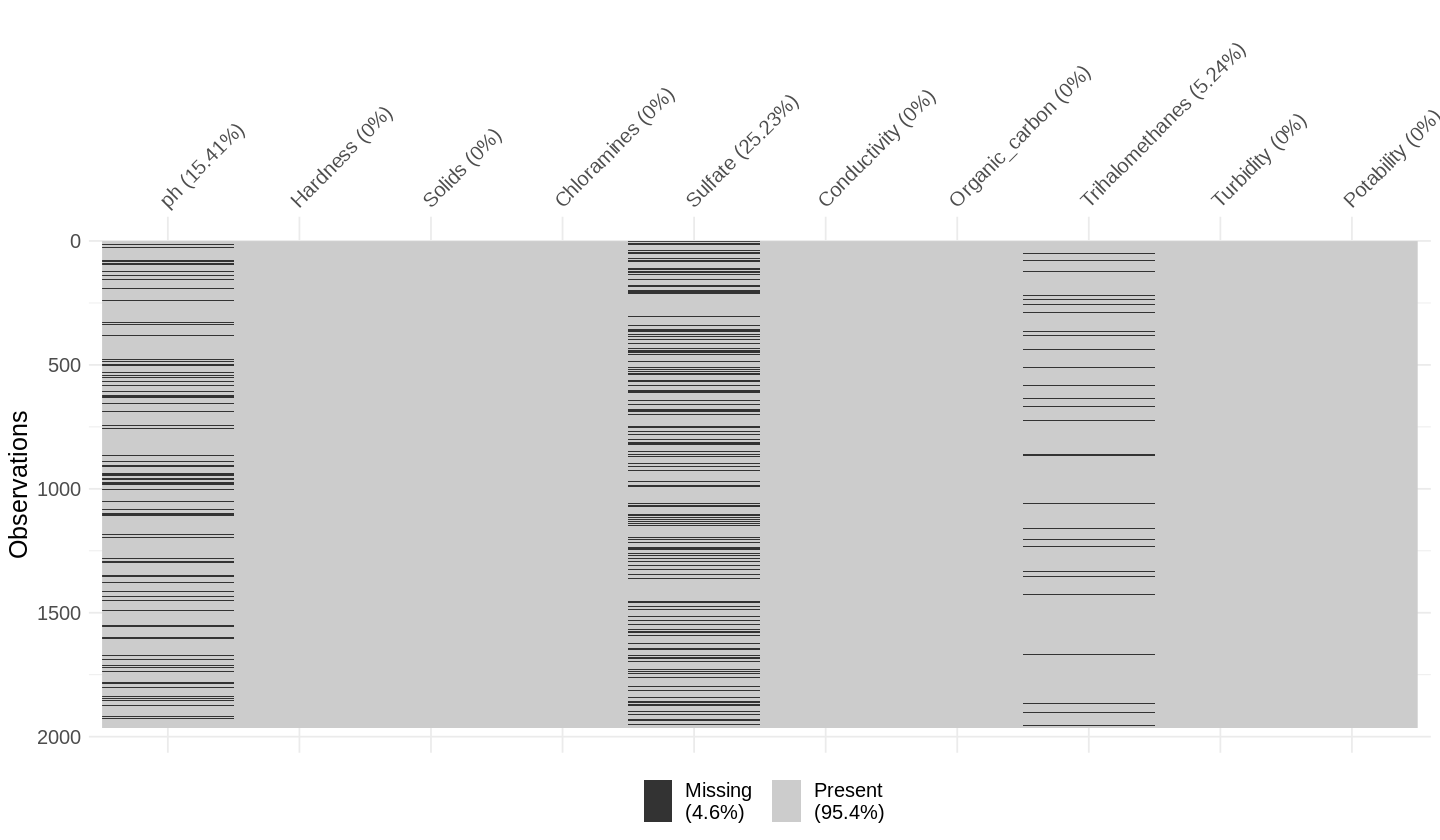

In [5]:
options(repr.plot.width=12, repr.plot.height=7)
vis_miss(water_train) +
theme(text = element_text(size=15)) 

### 4. Evaluating frequency and distribution of our predictors

Now, we will use histograms and box plots to determine the frequency as well as distribution of each variable in our dataset with respect to our target variable (Potability). We will then observe how different distributions of variables affects potability in water. This will help us plan how to visualize the results of our analysis in our final report.

Warning message:
“Removed 303 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 496 rows containing non-finite values (stat_bin).”


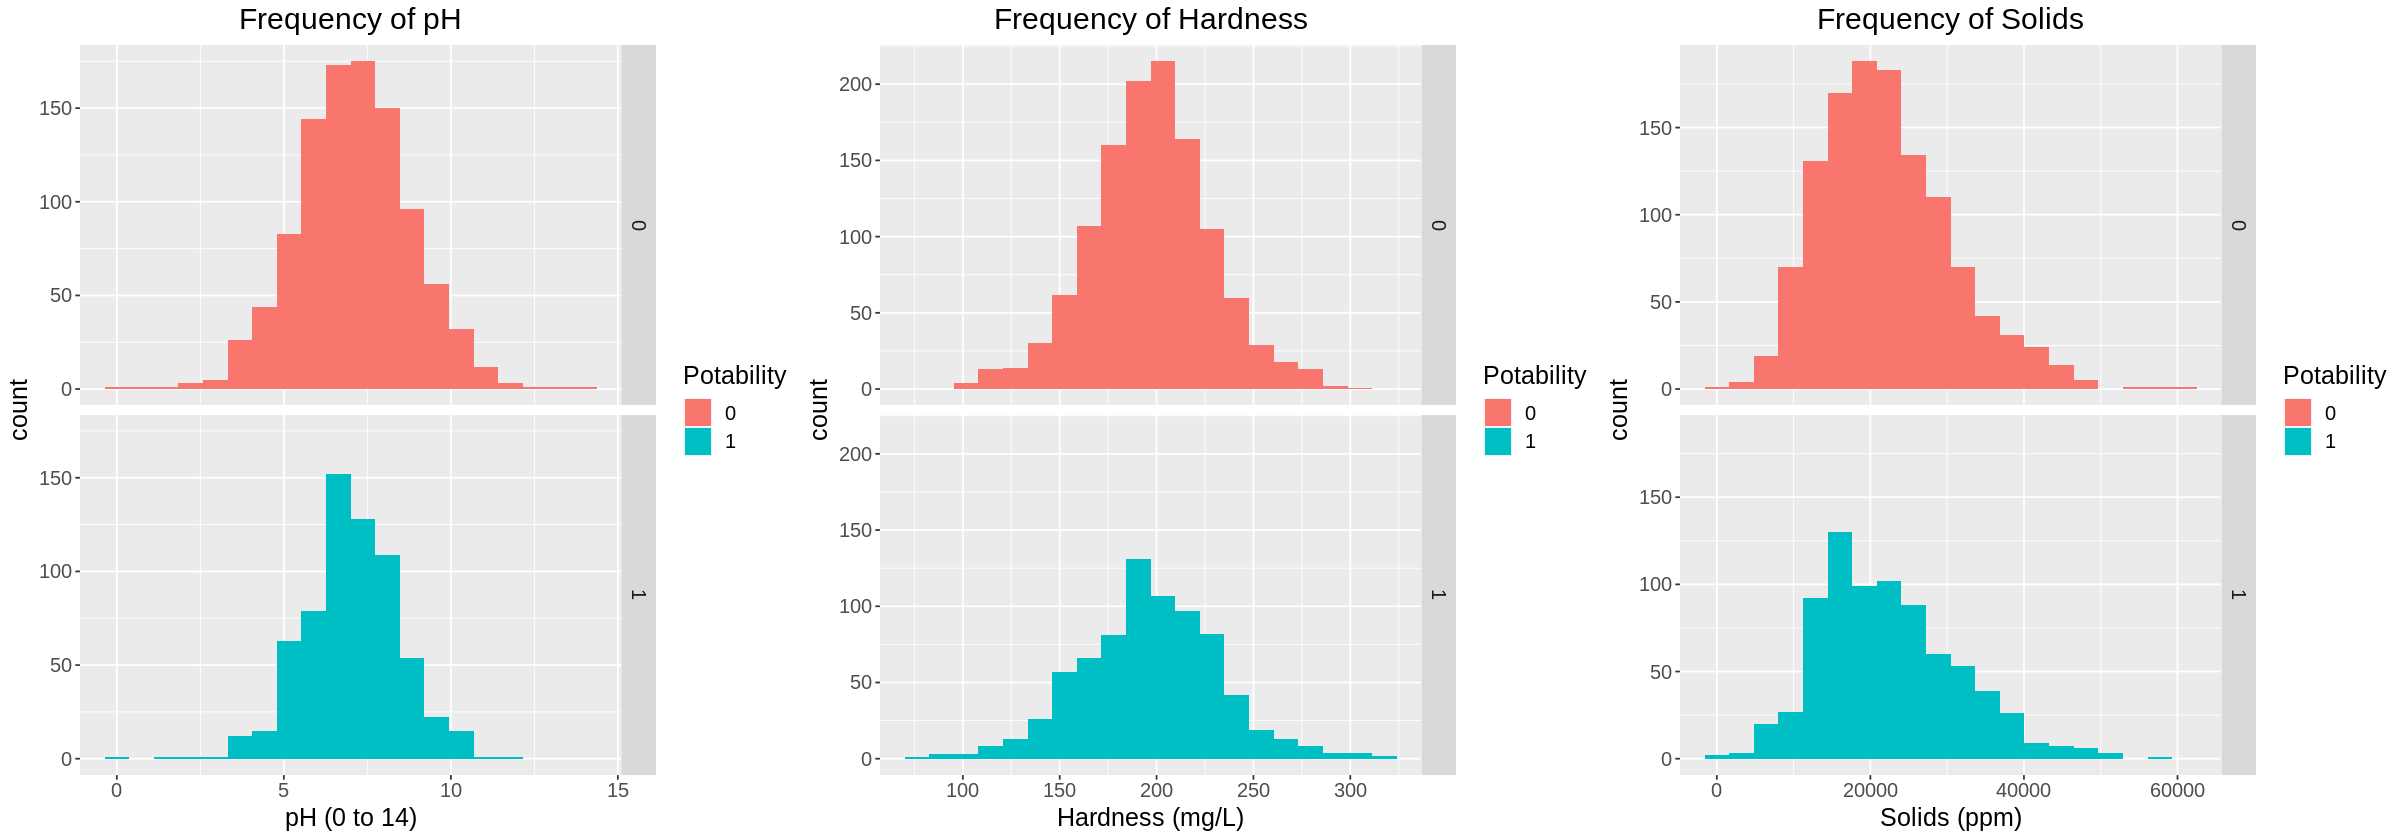

Warning message:
“Removed 103 rows containing non-finite values (stat_bin).”


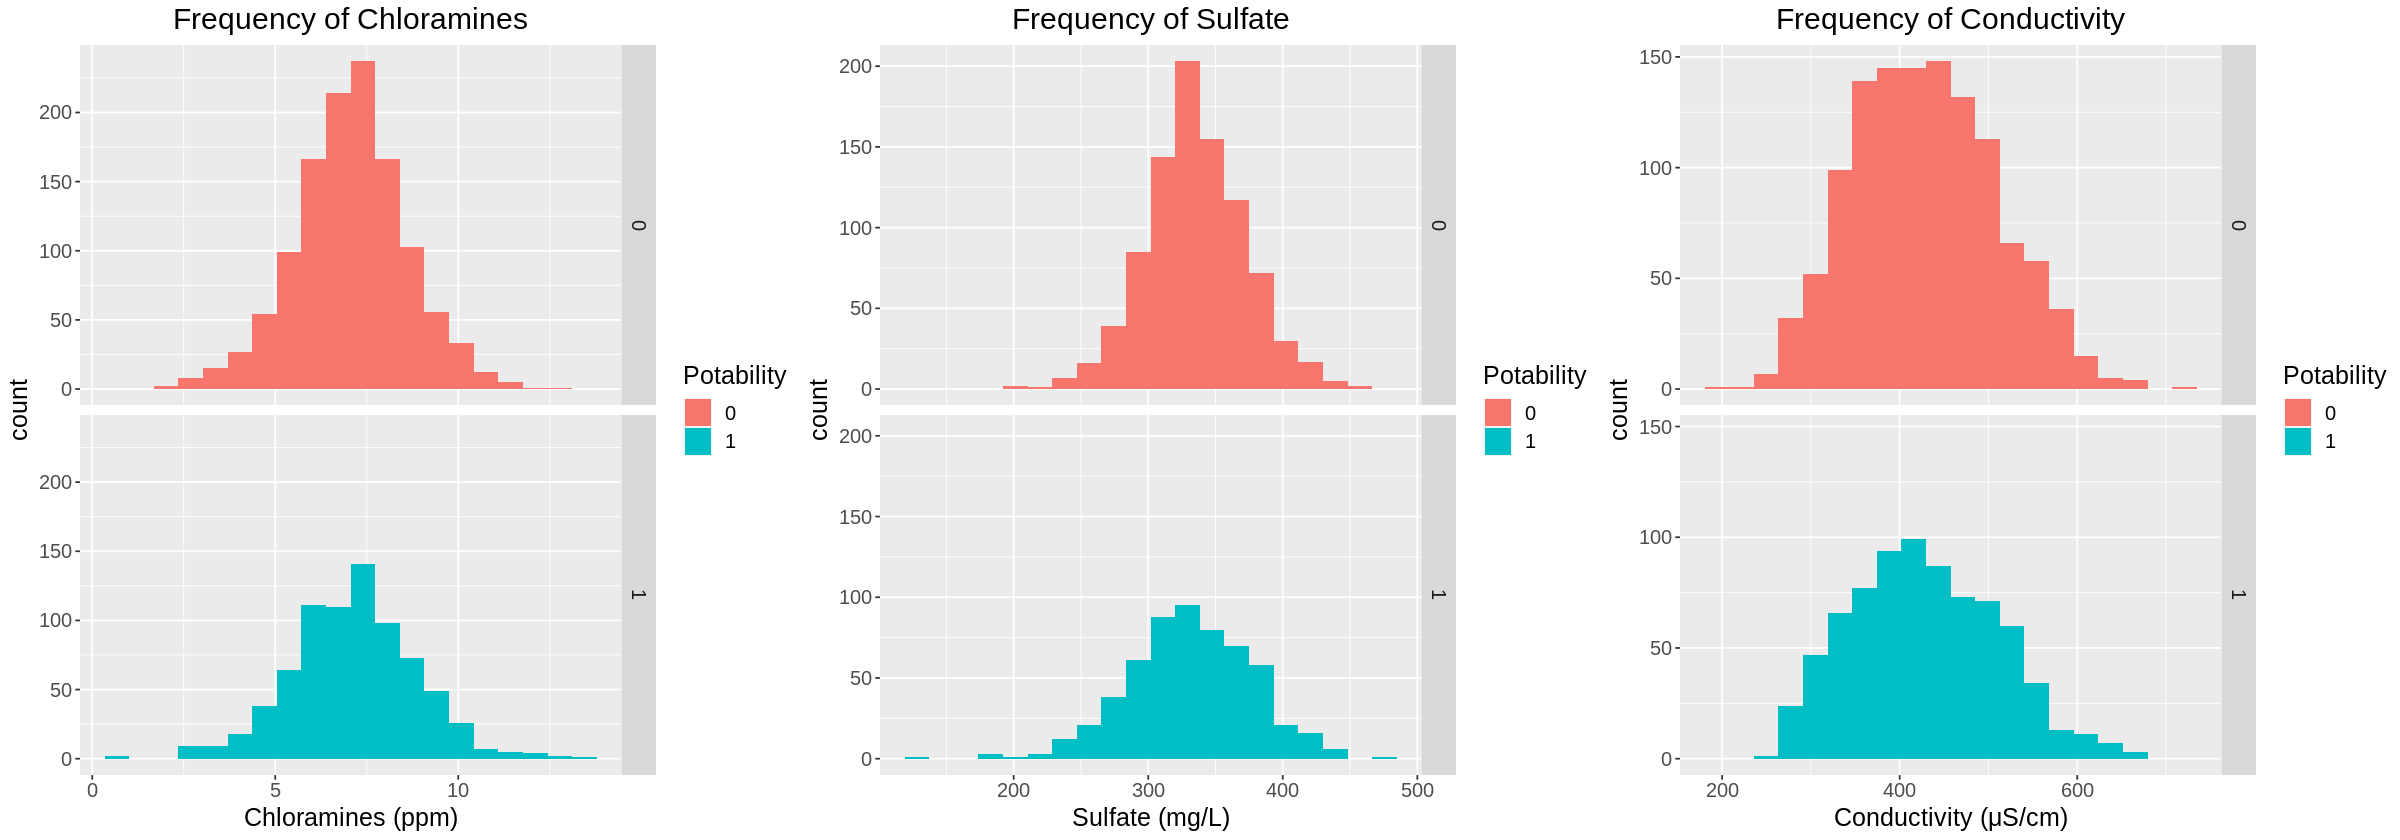

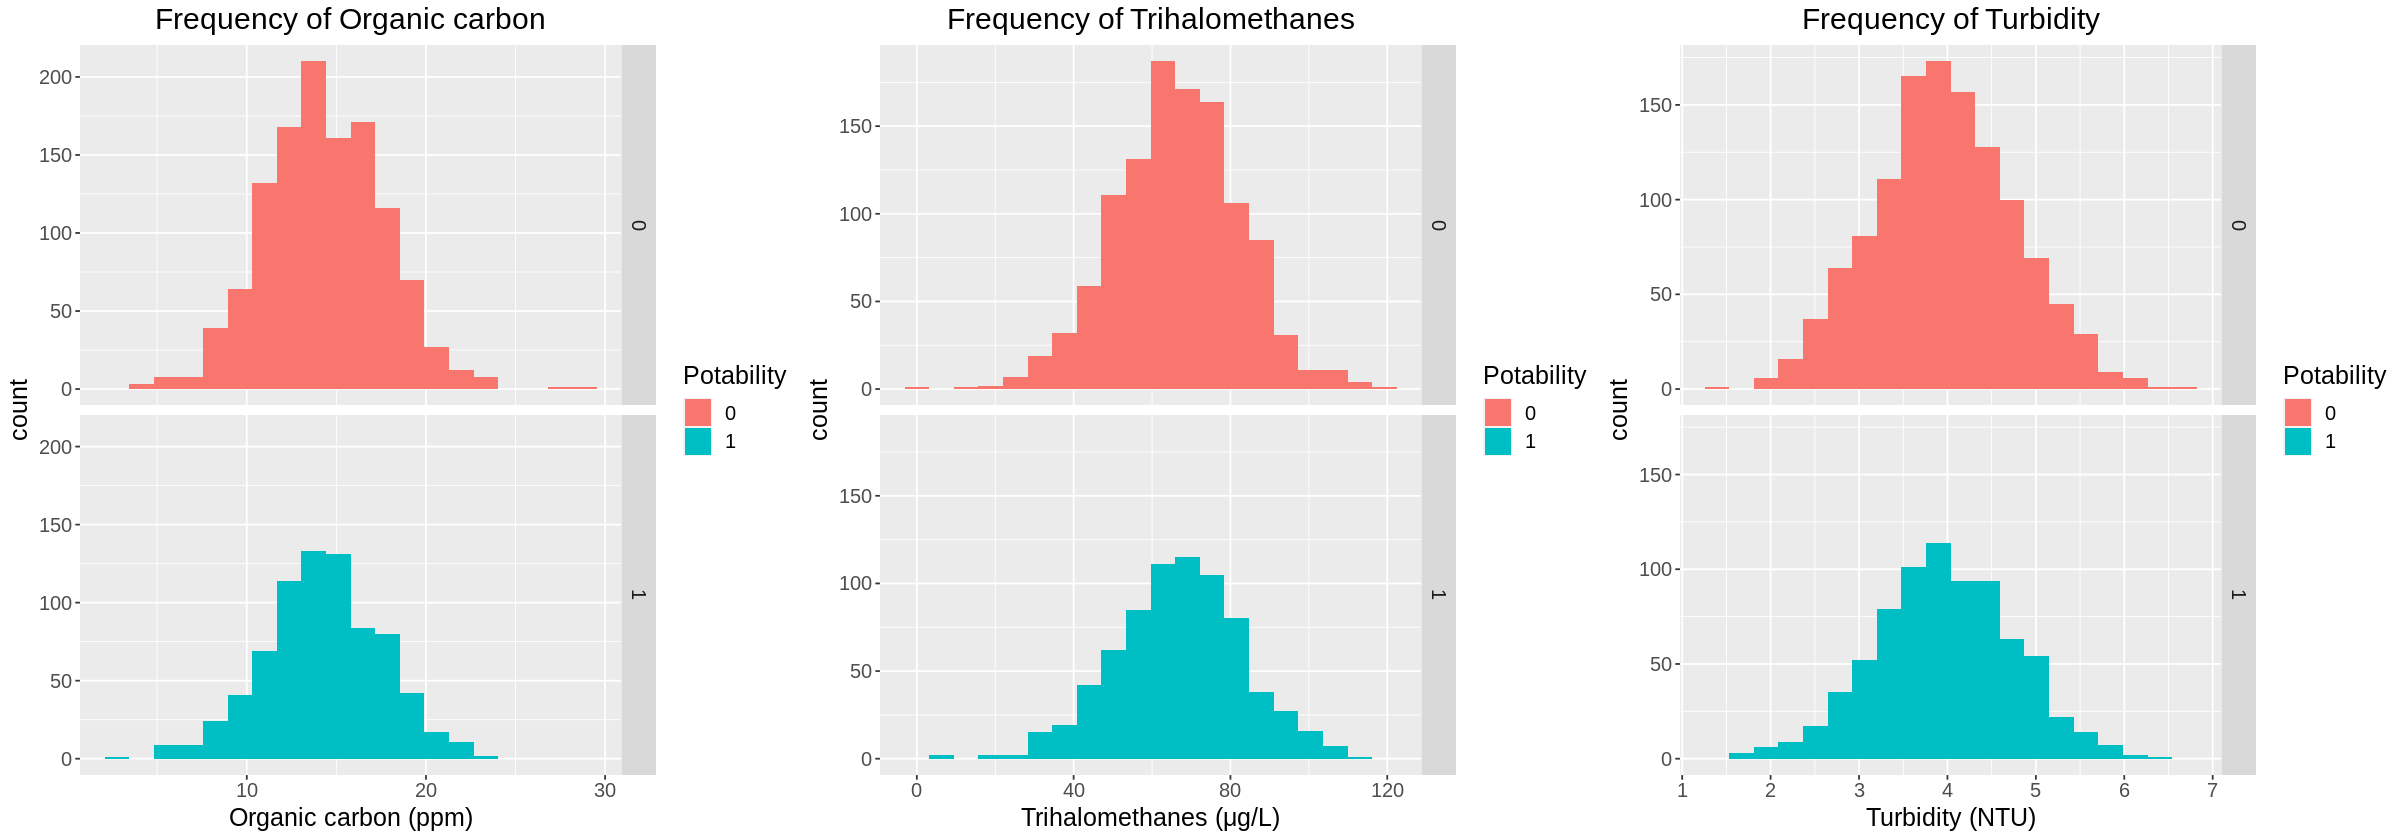

In [6]:
options(repr.plot.width=20, repr.plot.height=7)
water_cols <- names(water)
cols_units <- c("pH (0 to 14)", "Hardness (mg/L)", "Solids (ppm)", "Chloramines (ppm)",
               "Sulfate (mg/L)", "Conductivity (μS/cm)", "Organic carbon (ppm)",
               "Trihalomethanes (μg/L)", "Turbidity (NTU)")
histogram_titles <- c("Frequency of pH", "Frequency of Hardness", "Frequency of Solids", "Frequency of Chloramines",
                     "Frequency of Sulfate", "Frequency of Conductivity", "Frequency of Organic carbon",
                     "Frequency of Trihalomethanes", "Frequency of Turbidity")

# function used to create a histogram for given predictor, colored and separated by potability,
# with proper axes and title labels using ggplot
create_histogram = function(data_train, cols, units, titles, index) {
    histogram_plt <- ggplot(data_train, aes_string(x = cols[index])) +
        geom_histogram(aes(fill = Potability), bins=20) +
        labs(x=units[index]) + 
        ggtitle(titles[index]) +
        theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15)) +
        facet_grid(rows=vars(Potability))
    return(histogram_plt)
}

# arrange the 9 histograms in 3x3 format using grid.arrange
for (col in seq(1,9,by=3)) { 
    histogram_plt1 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col)
    histogram_plt2 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+1)
    histogram_plt3 <- create_histogram(water_train, water_cols, cols_units, histogram_titles, col+2)
    grid.arrange(histogram_plt1, histogram_plt2, histogram_plt3, ncol=3)
}

Using a box plot we visualise the distribution of each variable in our data set with respect to our target variable, i.e. Potability.

Warning message:
“Removed 303 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 496 rows containing non-finite values (stat_boxplot).”


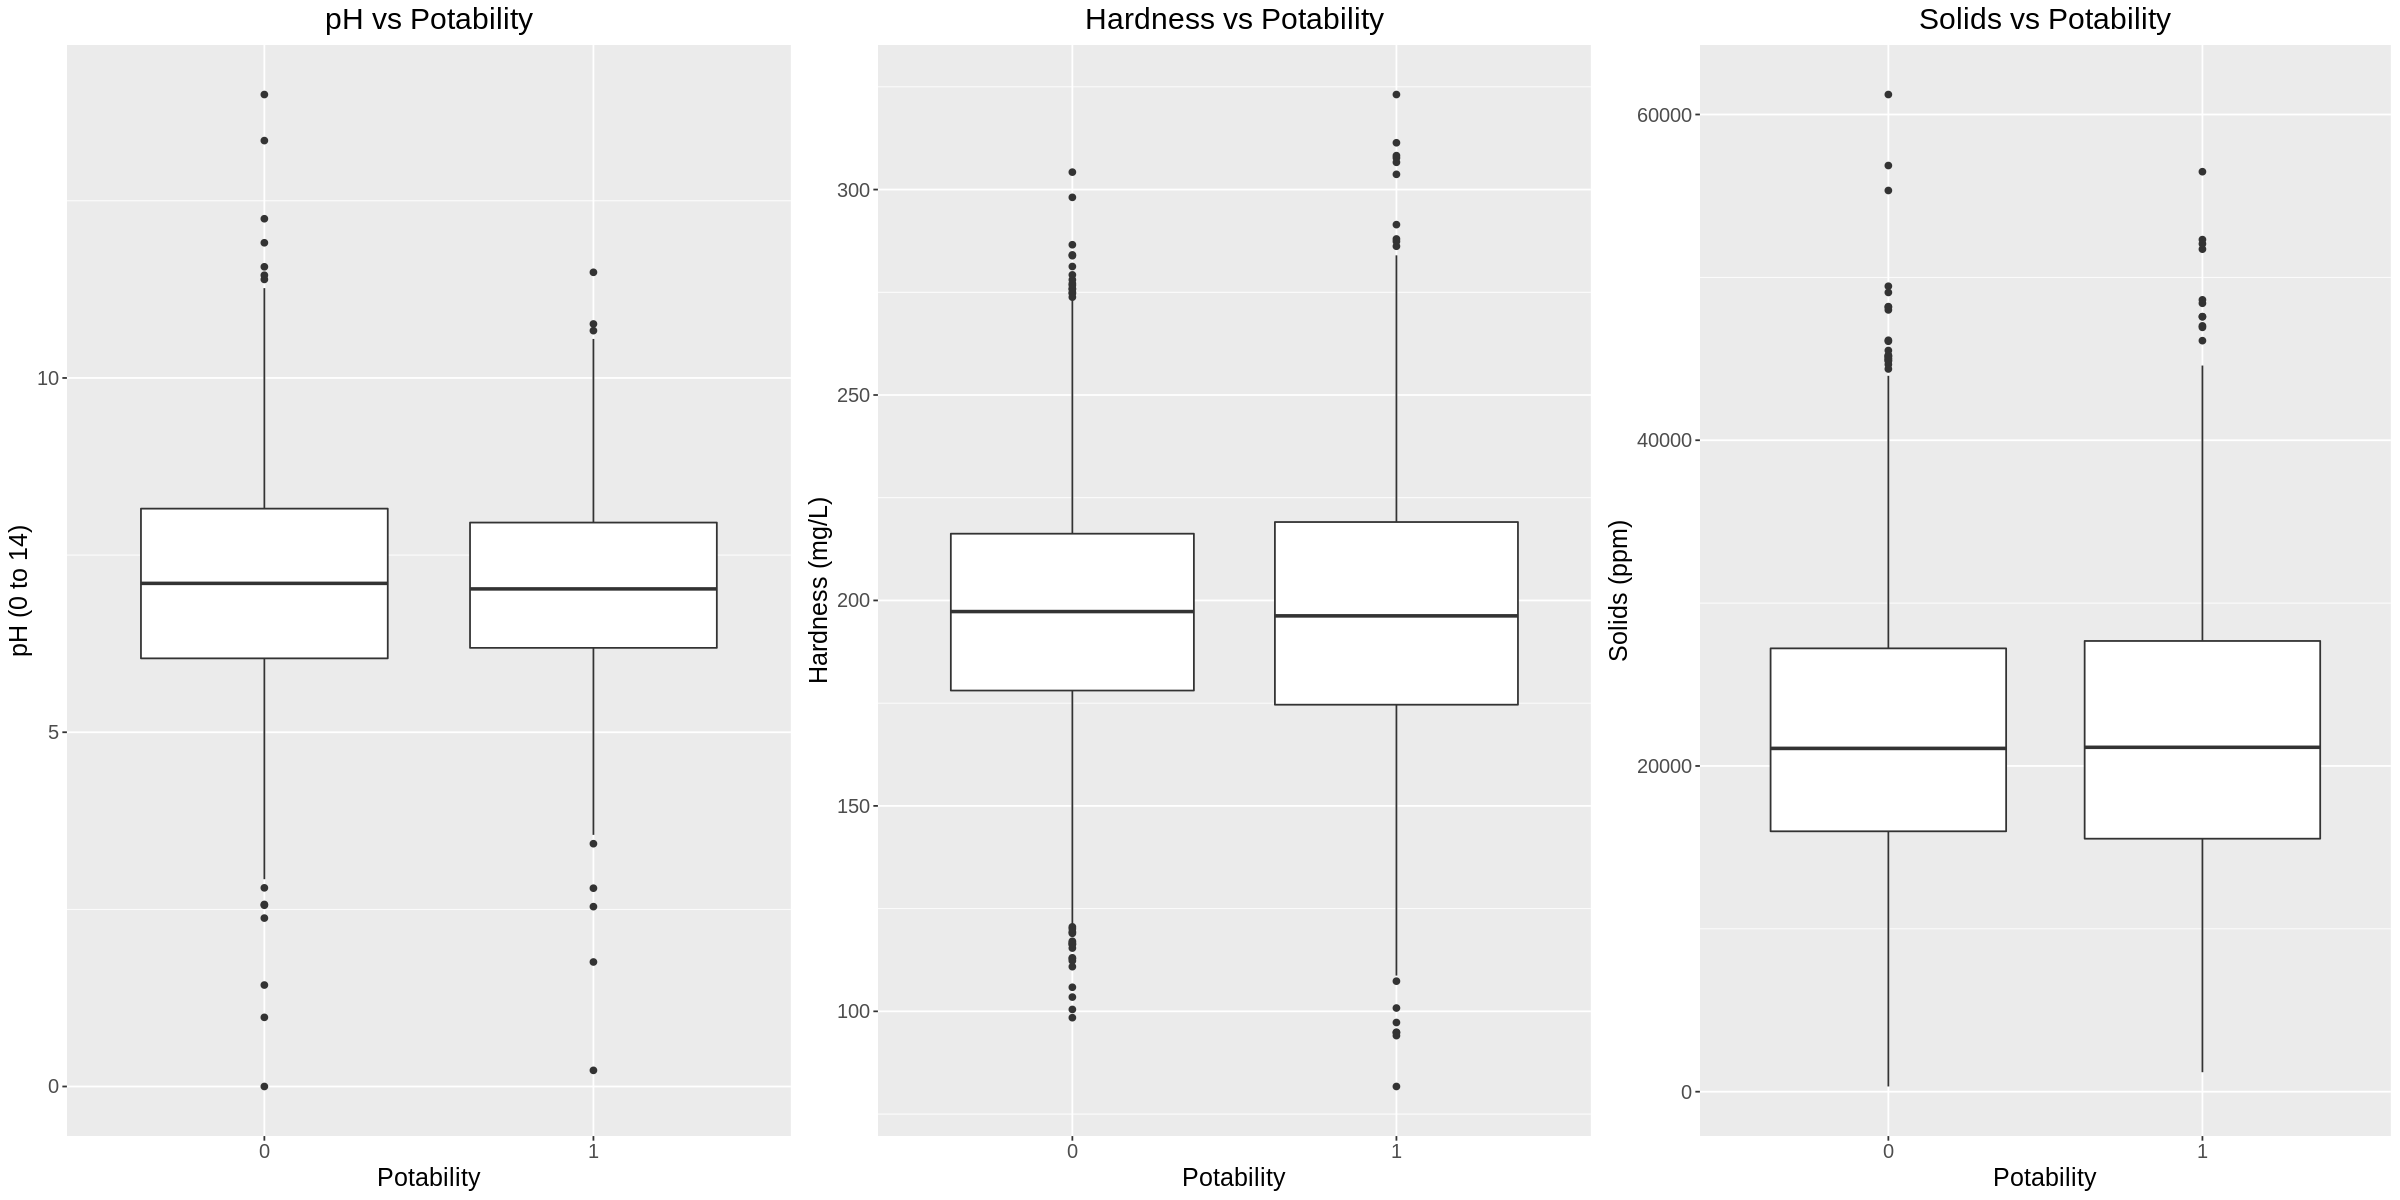

Warning message:
“Removed 103 rows containing non-finite values (stat_boxplot).”


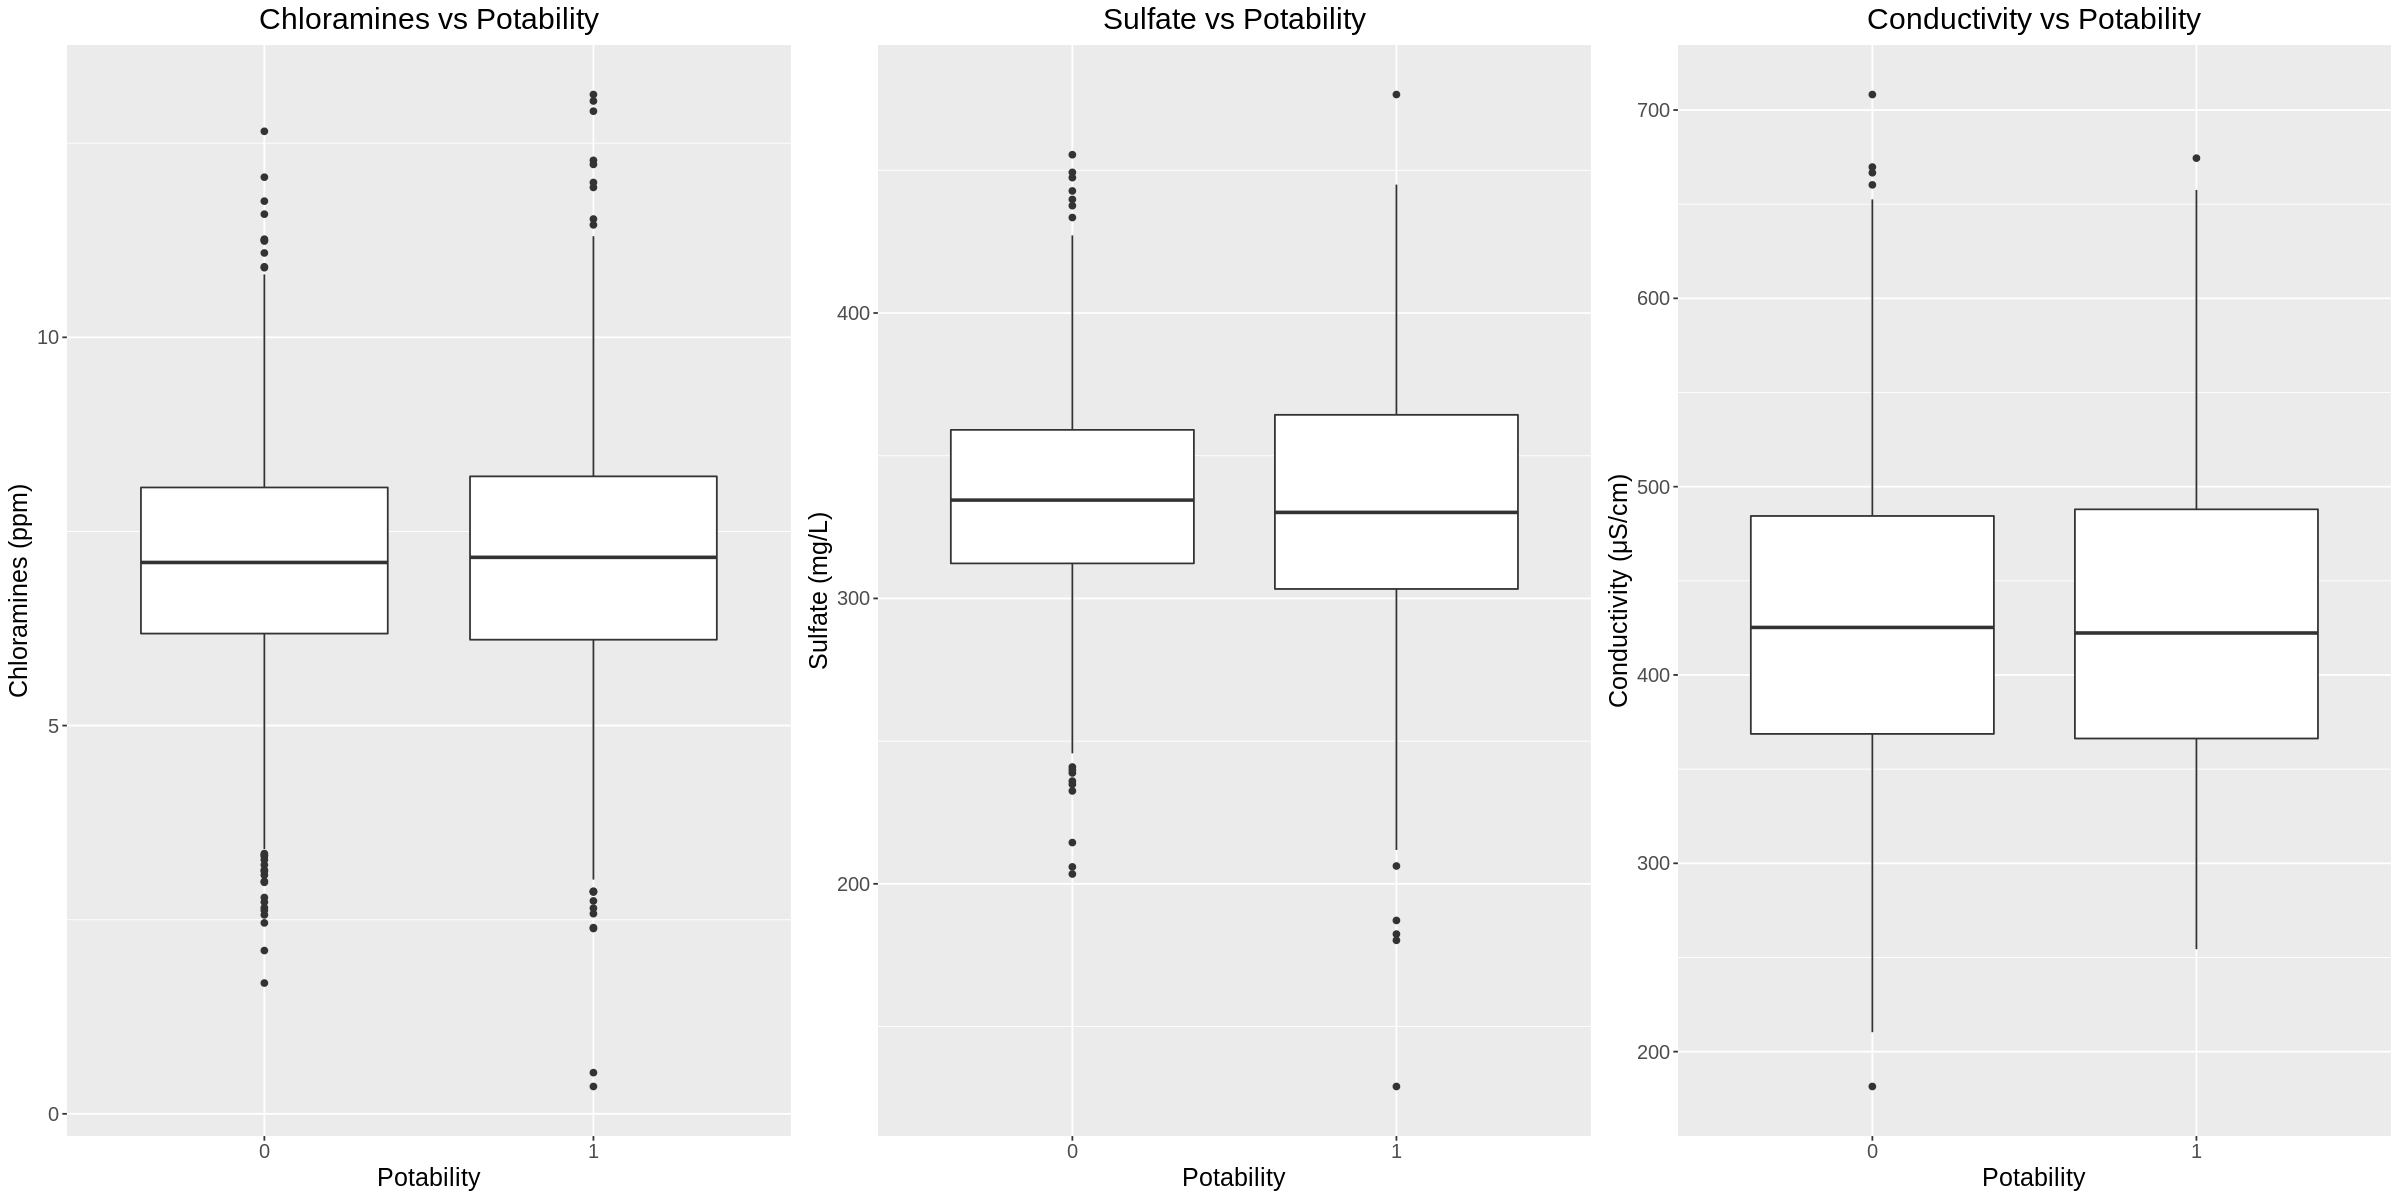

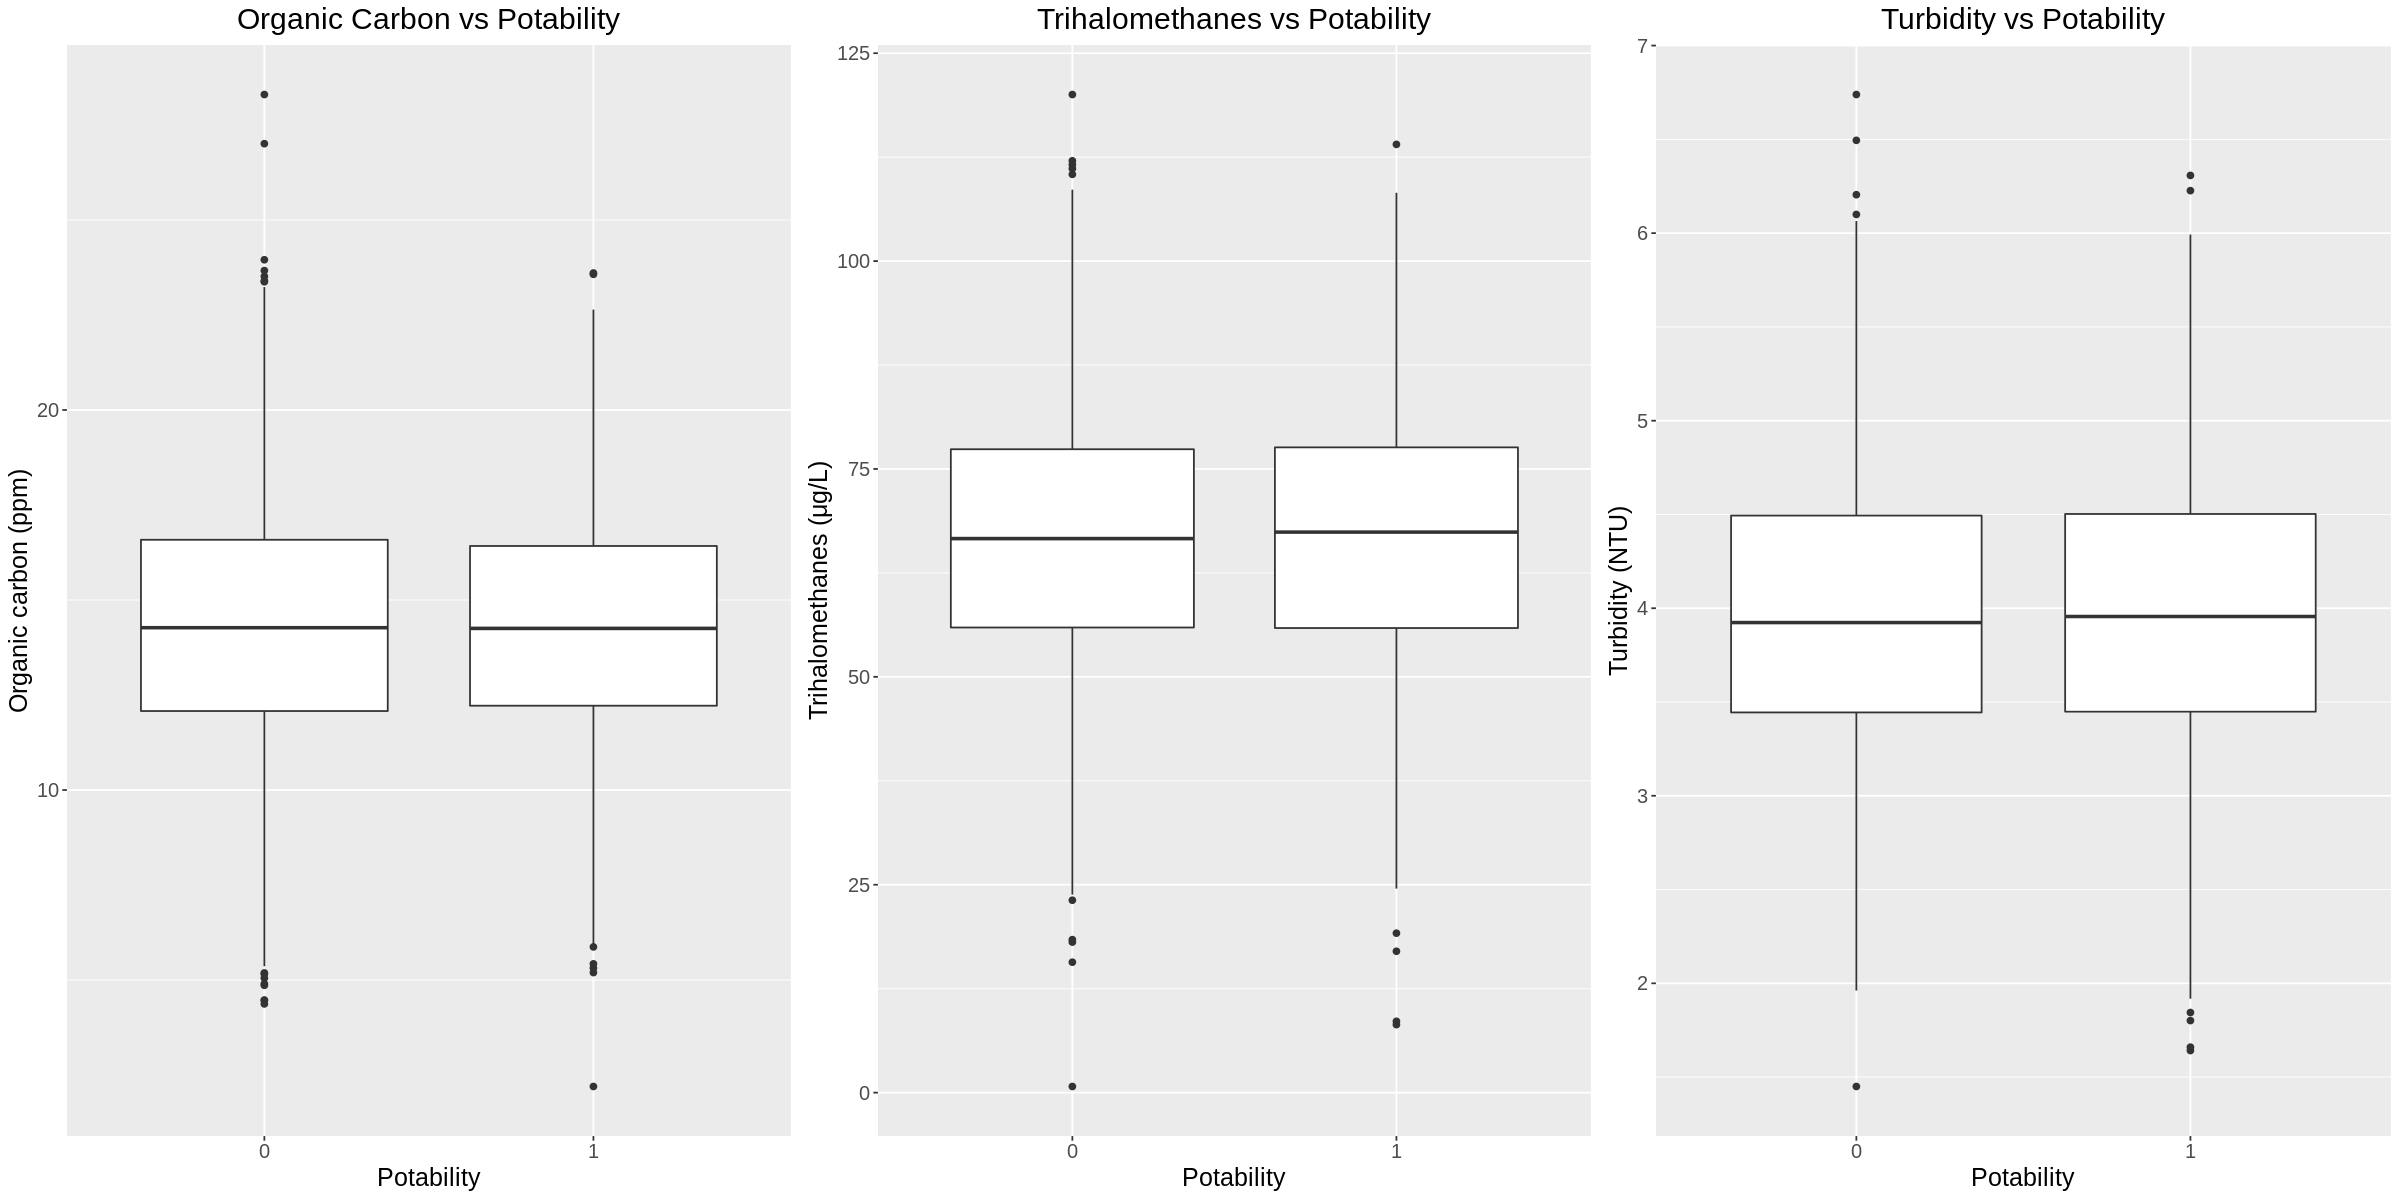

In [7]:
boxplot_titles <- c("pH vs Potability", "Hardness vs Potability", "Solids vs Potability", "Chloramines vs Potability",
                    "Sulfate vs Potability", "Conductivity vs Potability", "Organic Carbon vs Potability",
                   "Trihalomethanes vs Potability", "Turbidity vs Potability")

options(repr.plot.width = 20, repr.plot.height = 10)

# function used to create a boxplot for given predictor vs potability with proper axes and title labels using ggplot
create_boxplot <- function(data_train, cols, units, titles, index) {
    boxplt <- ggplot(data_train, aes_string(x="Potability", y=cols[index])) +
    geom_boxplot()  +
    labs(y = units[index]) + 
    ggtitle(titles[index]) +
    theme(plot.title = element_text(hjust = 0.5), text = element_text(size=15))
    return(boxplt)
}

# arrange the 9 boxplots in 3x3 format using grid.arrange
for (col in seq(1,9,by=3)) { 
    boxplot1 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col)
    boxplot2 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+1)
    boxplot3 <- create_boxplot(water_train, water_cols, cols_units, boxplot_titles, col+2)
    grid.arrange(boxplot1, boxplot2, boxplot3, ncol=3)
}

### 5. Exploring the Relation between different variables

We will now use the ggpairs() function from the GGaly package to explore the relation between the different variables:

Warning message:
“Removed 188 rows containing non-finite values (stat_density).”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 188 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 188 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 188 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 431 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 188 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 188 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 236 rows containing missing val

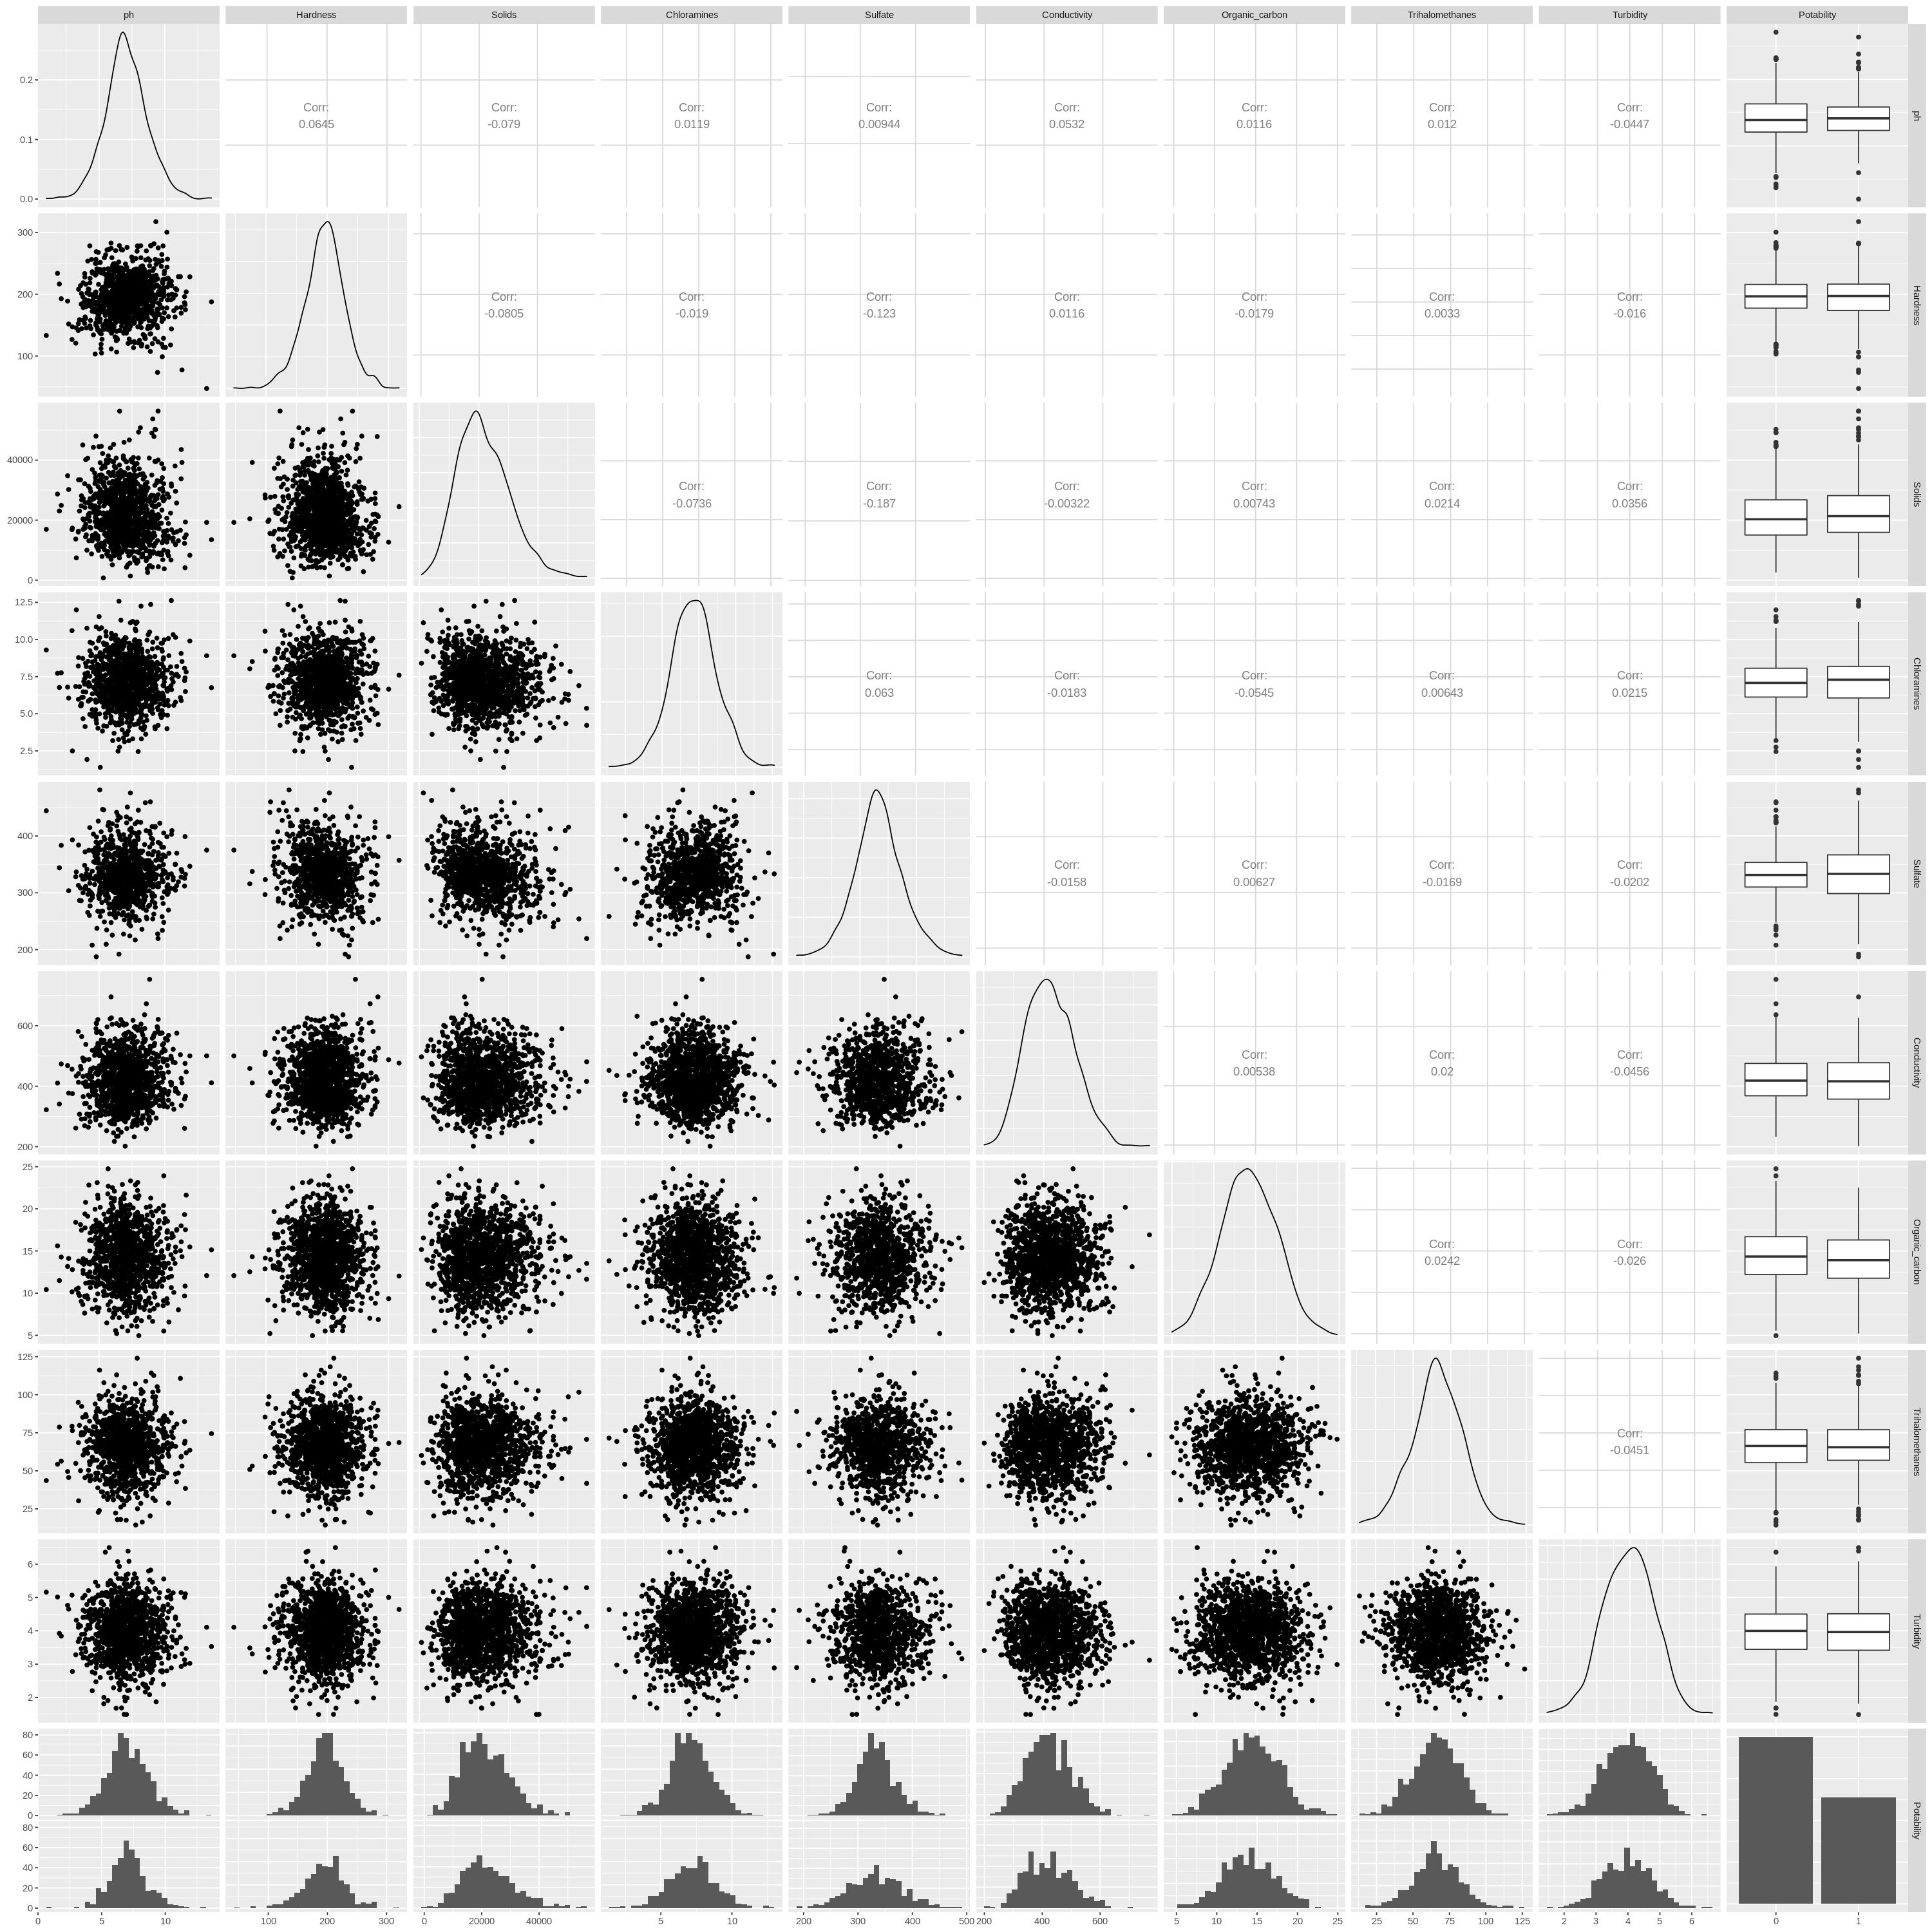

In [17]:
ggpairs_1 <- ggpairs(water_test, columns = 1:10)
ggpairs_1
options(repr.plot.width = 35, repr.plot.height = 25)

### 6. Creating a correlation matrix for each pair of predictors

To summarize the relationships between variables in the dataset, we create a correlation matrix. It can help find out pairs of variables with relatively high correlation coefficients which means that it would be redundant to include both as predictors since they would contribute similarly to the predictions.

In [8]:
# Create a correlation matrix to show correlation coefficients between variables
water_train_wo_na <- water_train %>%
    select(- Potability) %>%
    drop_na()

cor_matrix <- cor(water_train_wo_na)
cor_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000000,0.13858139,-0.091738710,-0.06985335,0.019487138,-0.006091202,0.051537223,0.022090249,-0.041988069
Hardness,0.138581394,1.00000000,-0.019527840,-0.03266186,-0.083718996,-0.015645509,0.028256799,-0.019304360,-0.037263274
Solids,-0.091738710,-0.01952784,1.000000000,-0.04223770,-0.149643087,-0.021377431,0.004279971,-0.044770655,0.002552958
Chloramines,-0.069853349,-0.03266186,-0.042237697,1.00000000,-0.001170330,-0.032929177,0.017715429,0.024975062,0.018301685
Sulfate,0.019487138,-0.08371900,-0.149643087,-0.00117033,1.000000000,-0.024354193,0.027186566,-0.041669517,0.001120304
Conductivity,-0.006091202,-0.01564551,-0.021377431,-0.03292918,-0.024354193,1.000000000,0.005078377,-0.008118515,0.035529838
Organic_carbon,0.051537223,0.02825680,0.004279971,0.01771543,0.027186566,0.005078377,1.000000000,-0.024447750,-0.024093787
Trihalomethanes,0.022090249,-0.01930436,-0.044770655,0.02497506,-0.041669517,-0.008118515,-0.024447750,1.000000000,-0.005367330
Turbidity,-0.041988069,-0.03726327,0.002552958,0.01830168,0.001120304,0.035529838,-0.024093787,-0.005367330,1.000000000


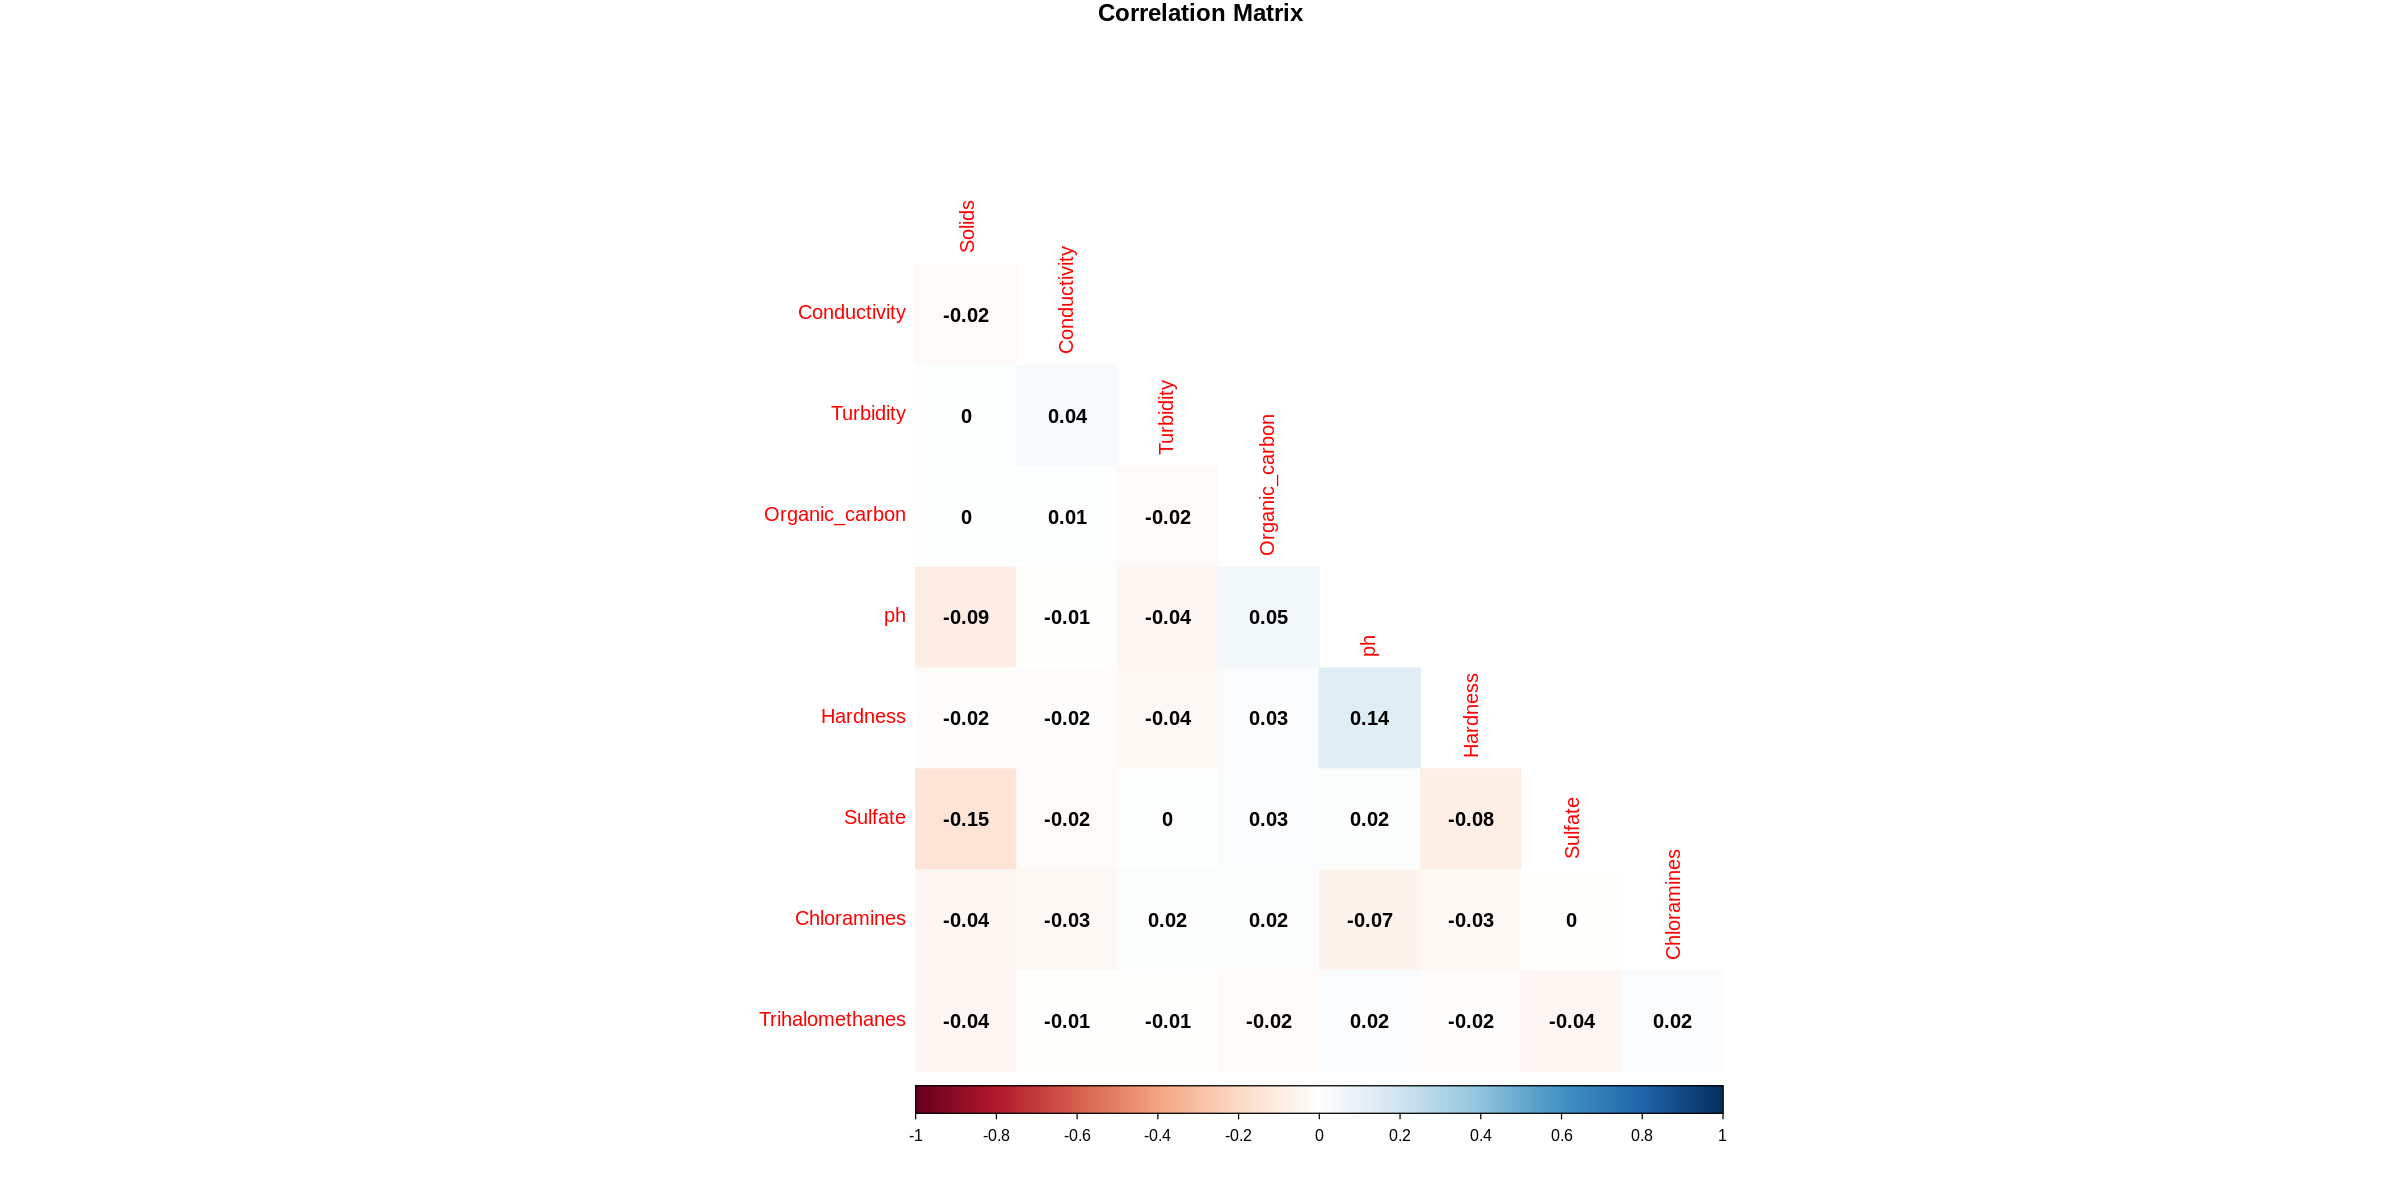

In [9]:
# Plot the above correlation matrix
corrplot(cor_matrix, method = 'color', diag = FALSE, 
         type = "lower", order = "hclust", title = 'Correlation Matrix',
         addCoef.col = "black",
         mar = c(0,0,1,0)) 

## Methods 

A large part of our data analysis is based on finding the compounds in the water that affect its potability the most. We will start our data analysis by first filtering out the rows that have N/A values. To account for the imbalance of the potability label, we plan to apply upsampling. We will then standardize the values in our dataset so that we get an accurate model. 

Moreover, we aim to first include all columns in our data analysis and then use the forward selection method to determine the most accurate predictors for our dataset. We decided to use all columns because they all describe the quality and presence of chemicals in the water. For instance, the pH can be a useful predictor for us because extremely high or low levels of pH can make water unsafe from the get-go. The presence of compounds such as solids and sulfate can further affect water quality. Columns such as hardness, turbidity, and conductivity can directly tell us about the properties the water holds. Additionally, the correlation matrix shows that there is no high correlation between any pair of variables, so it is not very obvious which variables are redundant to include.

Next, the best subset of columns will then be analyzed using KNN classification to understand how the predictions are affected by these columns. To find a good value for K, we will be tuning K using values between [1, 100] with a step size of 10 and using 10-fold cross-validation. To visualize the accuracies of the sets of columns used by the forward selection method, we are going to use a line plot to represent the accuracy vs the number of predictors. We will also plot how the accuracy of our model changes with varying K values using another line plot. Moreover, histograms will be used to visualize the distribution of our predictions of potability, and scatterplots will be used to show the relationship between each predictor used and its effect on potability. Finally, we will discuss and reflect on what our results mean in the context of predicting the potability of water in third world countries.


## Outcomes

From the histograms and boxplots, we can expect that the accuracy of the model will not be very high. However, we can also expect some predictors to have stronger predictive power than others, so there should be a subset of predictors that yields the highest accuracy.

Our data analysis will help Dr. Doe understand which chemical compound’s presence in water is affecting water quality the most. The hazards chemicals pose to water can then be studied and effective remedies to prevent water pollution could be put in place. This study can open doors for further research to determine how one chemical compound/pollutant affects water quality as compared to the presence of natural chemicals in the water. Some questions that may be posed are: How can we sanitize/clean this polluted water without extracting its natural minerals? How can we distribute safe water to children throughout the country? And which age group is affected most by contaminated water? 


## Data preprocessing

From our exploratory analysis, we observed that the training and testing data contain many rows with NA values, so we need to filter these rows out.

In [10]:
water_train <- water_train %>%
            drop_na()
water_train
water_test <- water_test %>%
            drop_na()
water_test

ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8.316766,214.3734,22018.42,8.059332,356.8861,363.2665,18.436524,100.34167,4.628771,0
5.584087,188.3133,28748.69,7.544869,326.6784,280.4679,8.399735,54.91786,2.559708,0
10.223862,248.0717,28749.72,7.513408,393.6634,283.6516,13.789695,84.60356,2.672989,0
11.180284,227.2315,25484.51,9.077200,404.0416,563.8855,17.927806,71.97660,4.370562,0
7.360640,165.5208,32452.61,7.550701,326.6244,425.3834,15.586810,78.74002,3.662292,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.923636,260.59315,24792.53,5.501164,332.2322,607.7736,15.483027,51.53587,4.013339,1
8.989900,215.04736,15921.41,6.297312,312.9310,390.4102,9.899115,55.06930,4.613843,1
6.702547,207.32109,17246.92,7.708117,304.5102,329.2660,16.217303,28.87860,3.442983,1


ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9.092223,181.1015,17978.99,6.546600,310.1357,398.4108,11.55828,31.99799,4.075075,0
8.635849,203.3615,13672.09,4.563009,303.3098,474.6076,12.36382,62.79831,4.401425,0
7.119824,156.7050,18730.81,3.606036,282.3441,347.7150,15.92954,79.50078,3.445756,0
7.371050,214.4966,25630.32,4.432669,335.7544,469.9146,12.50916,62.79728,2.560299,0
6.660212,168.2837,30944.36,5.858769,310.9309,523.6713,17.88424,77.04232,3.749701,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.607224,160.5653,39184.85,7.826411,312.0561,503.1581,13.36699,62.02231,3.525027,1
6.683368,272.1117,18989.32,5.336202,336.5551,307.7250,20.17872,75.40226,5.208061,1
5.893103,239.2695,20526.67,6.349561,341.2564,403.6176,18.96371,63.84632,4.390702,1


## Forward Selection

We now implement forward selection to find a subset of predictors which provides the highest accuracy for the model.

In [11]:
names <- colnames(water_train %>% select(-Potability))

water_formula <- paste("Potability", "~", paste(names, collapse="+"))
water_formula

[1] "Potability ~ ph+Hardness+Solids+Chloramines+Sulfate+Conductivity+Organic_carbon+Trihalomethanes+Turbidity"

In [12]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 10-fold cross-validation object
water_vfold <- vfold_cv(water_train, v = 10, strata = Potability)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Potability", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        water_recipe <- recipe(as.formula(model_string), 
                                data = water_train) %>%
                          step_upsample(Potability, over_ratio = 1) %>% 
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(water_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = water_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Potability ~ Conductivity,0.5660595
2,Potability ~ Conductivity+Solids,0.5591275
3,Potability ~ Conductivity+Solids+Sulfate,0.5566064
4,Potability ~ Conductivity+Solids+Sulfate+ph,0.5736214
5,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon,0.6214865
6,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness,0.6342427
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256
8,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines,0.6299831
9,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes+Chloramines+Turbidity,0.6308974


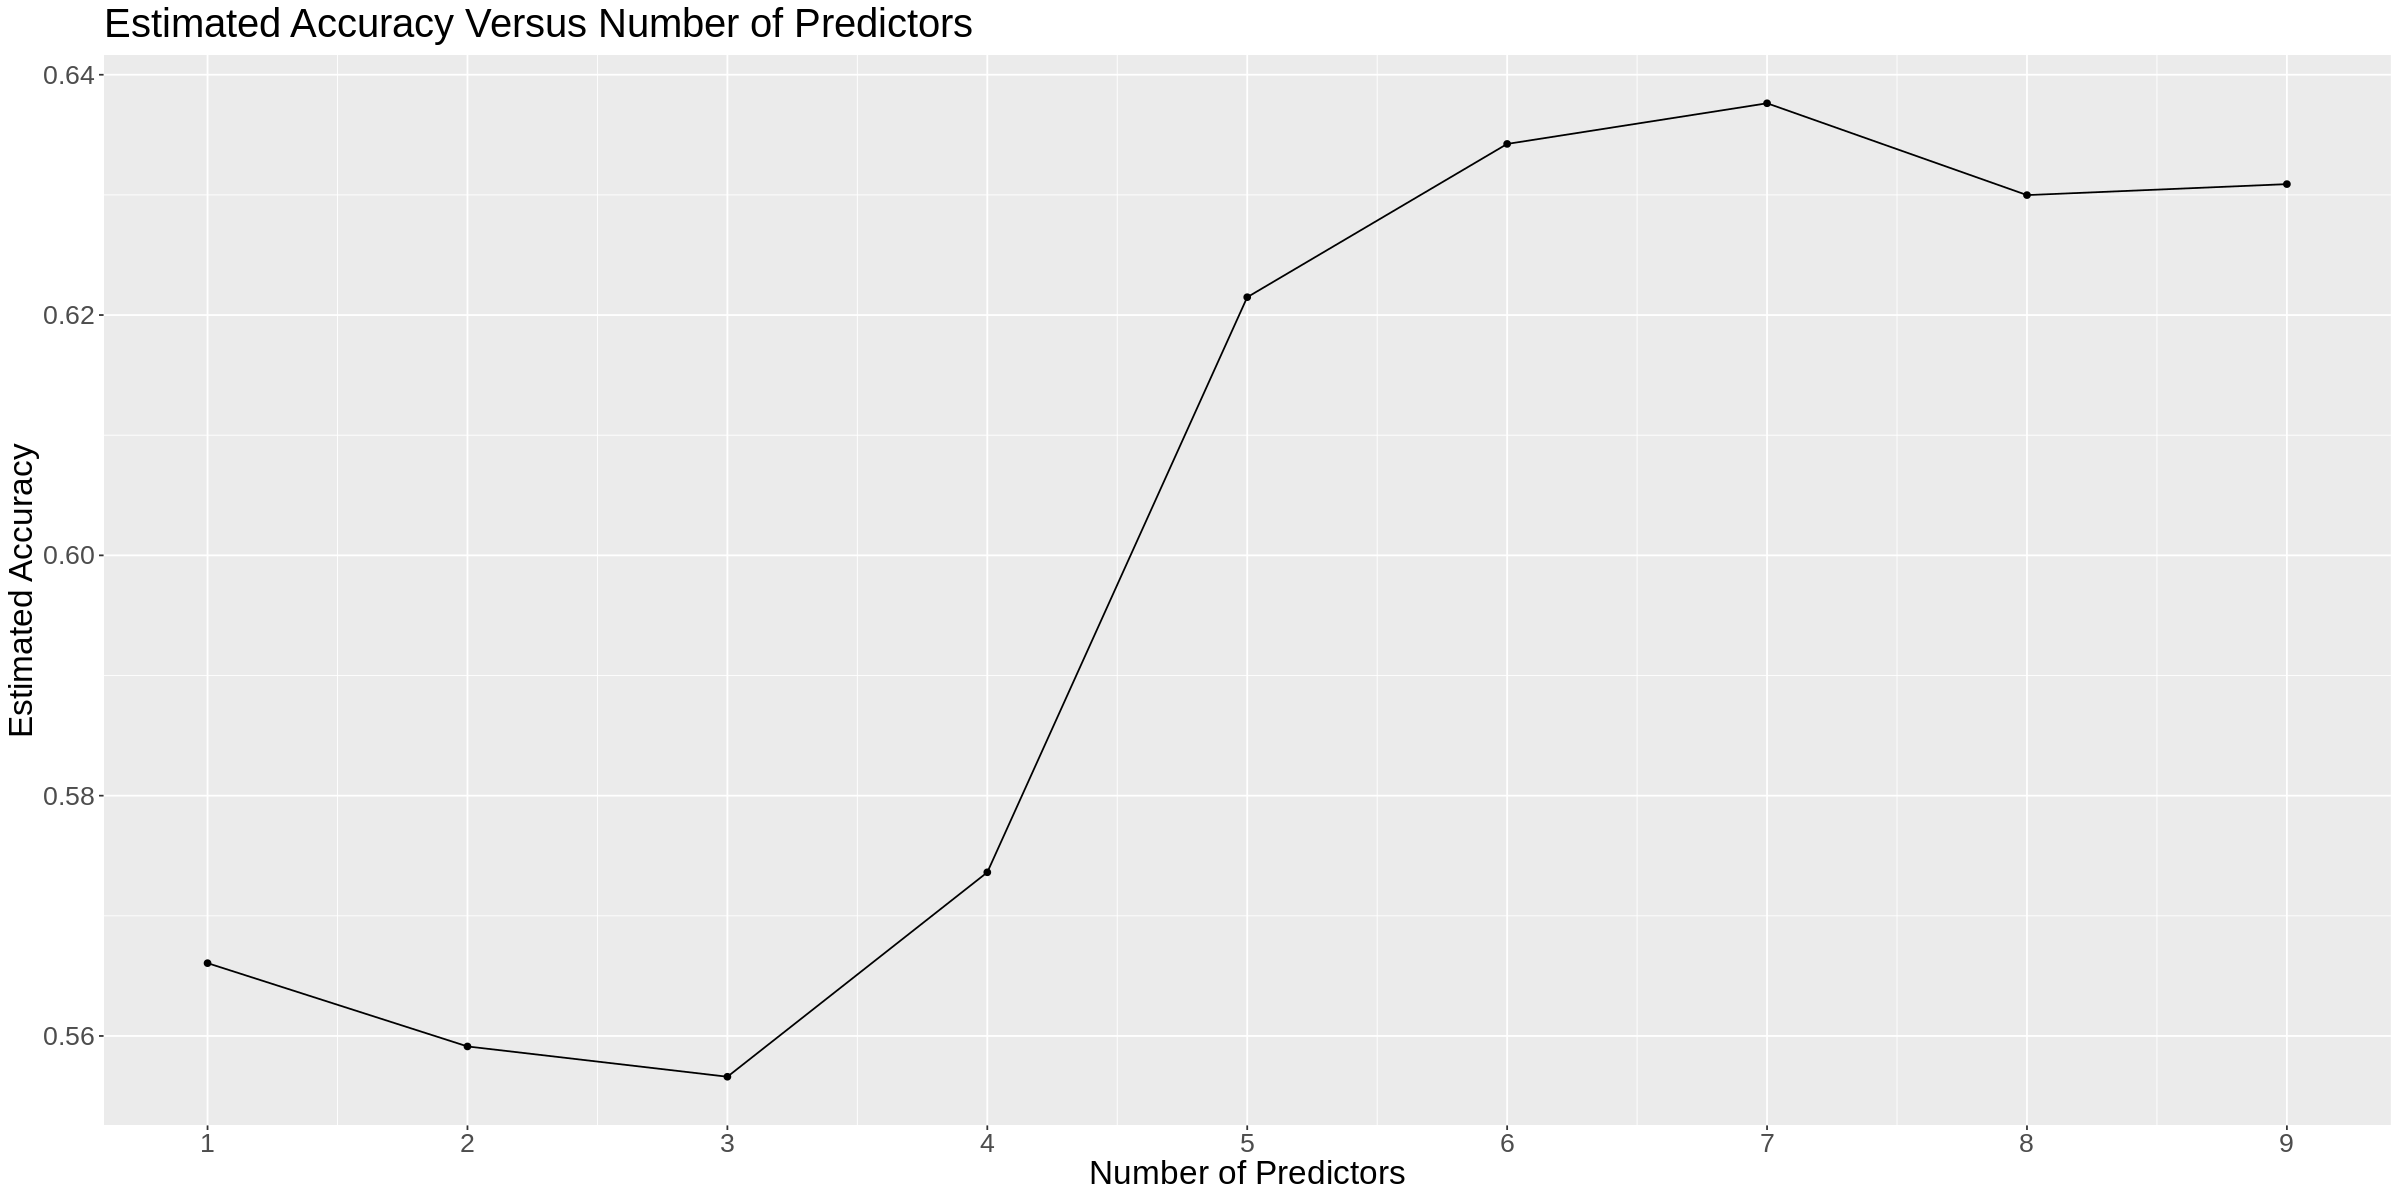

In [24]:
# plot estimated accuracy versus the number of predictors
forward_selection_plot <- accuracies %>%
    ggplot(aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = 'Number of Predictors', y = 'Estimated Accuracy') +
    scale_x_continuous(breaks = seq(1, 9, 1)) +
    ggtitle('Estimated Accuracy Versus Number of Predictors') + 
    theme(text = element_text(size = 20))

forward_selection_plot

In [20]:
# show the subset of predictors which has the highest accuracy
best_subset <- accuracies %>%
    filter(accuracy == max(accuracy)) %>%
    slice(1)

best_subset

size,model_string,accuracy
<int>,<chr>,<dbl>
7,Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes,0.6376256


According to the results of the forward selection, a subset of predictors including Conductivity, Solids, Sulfate, pH, Organic Carbon, Hardness and Trihalomethanes variables has the highest accuracy (0.6376). Hence, we will use these variables to train the model.

### Building the Model 

In [21]:
#build the knn model using training set 

water_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
              set_engine("kknn")%>%
              set_mode("classification")

gridvals <- tibble(neighbors = seq(from = 1, to = 100, by= 10))

#building recipe 
water_recipe <- recipe(Potability ~ Conductivity+Solids+Sulfate+ph+Organic_carbon+Hardness+Trihalomethanes, data = water_train)%>%
                step_upsample(Potability, over_ratio = 1) %>% 
                step_scale(all_predictors())%>%
                step_center(all_predictors())

#deciding the number of folds for cross validation 
water_vfold <- vfold_cv(water_train, v= 10, strata = Potability)

water_fit <- workflow()%>%
             add_recipe(water_recipe)%>%
             add_model(water_spec)%>%
             tune_grid(resamples = water_vfold, grid= gridvals)%>%
             collect_metrics() %>%
             filter(.metric == "accuracy")          

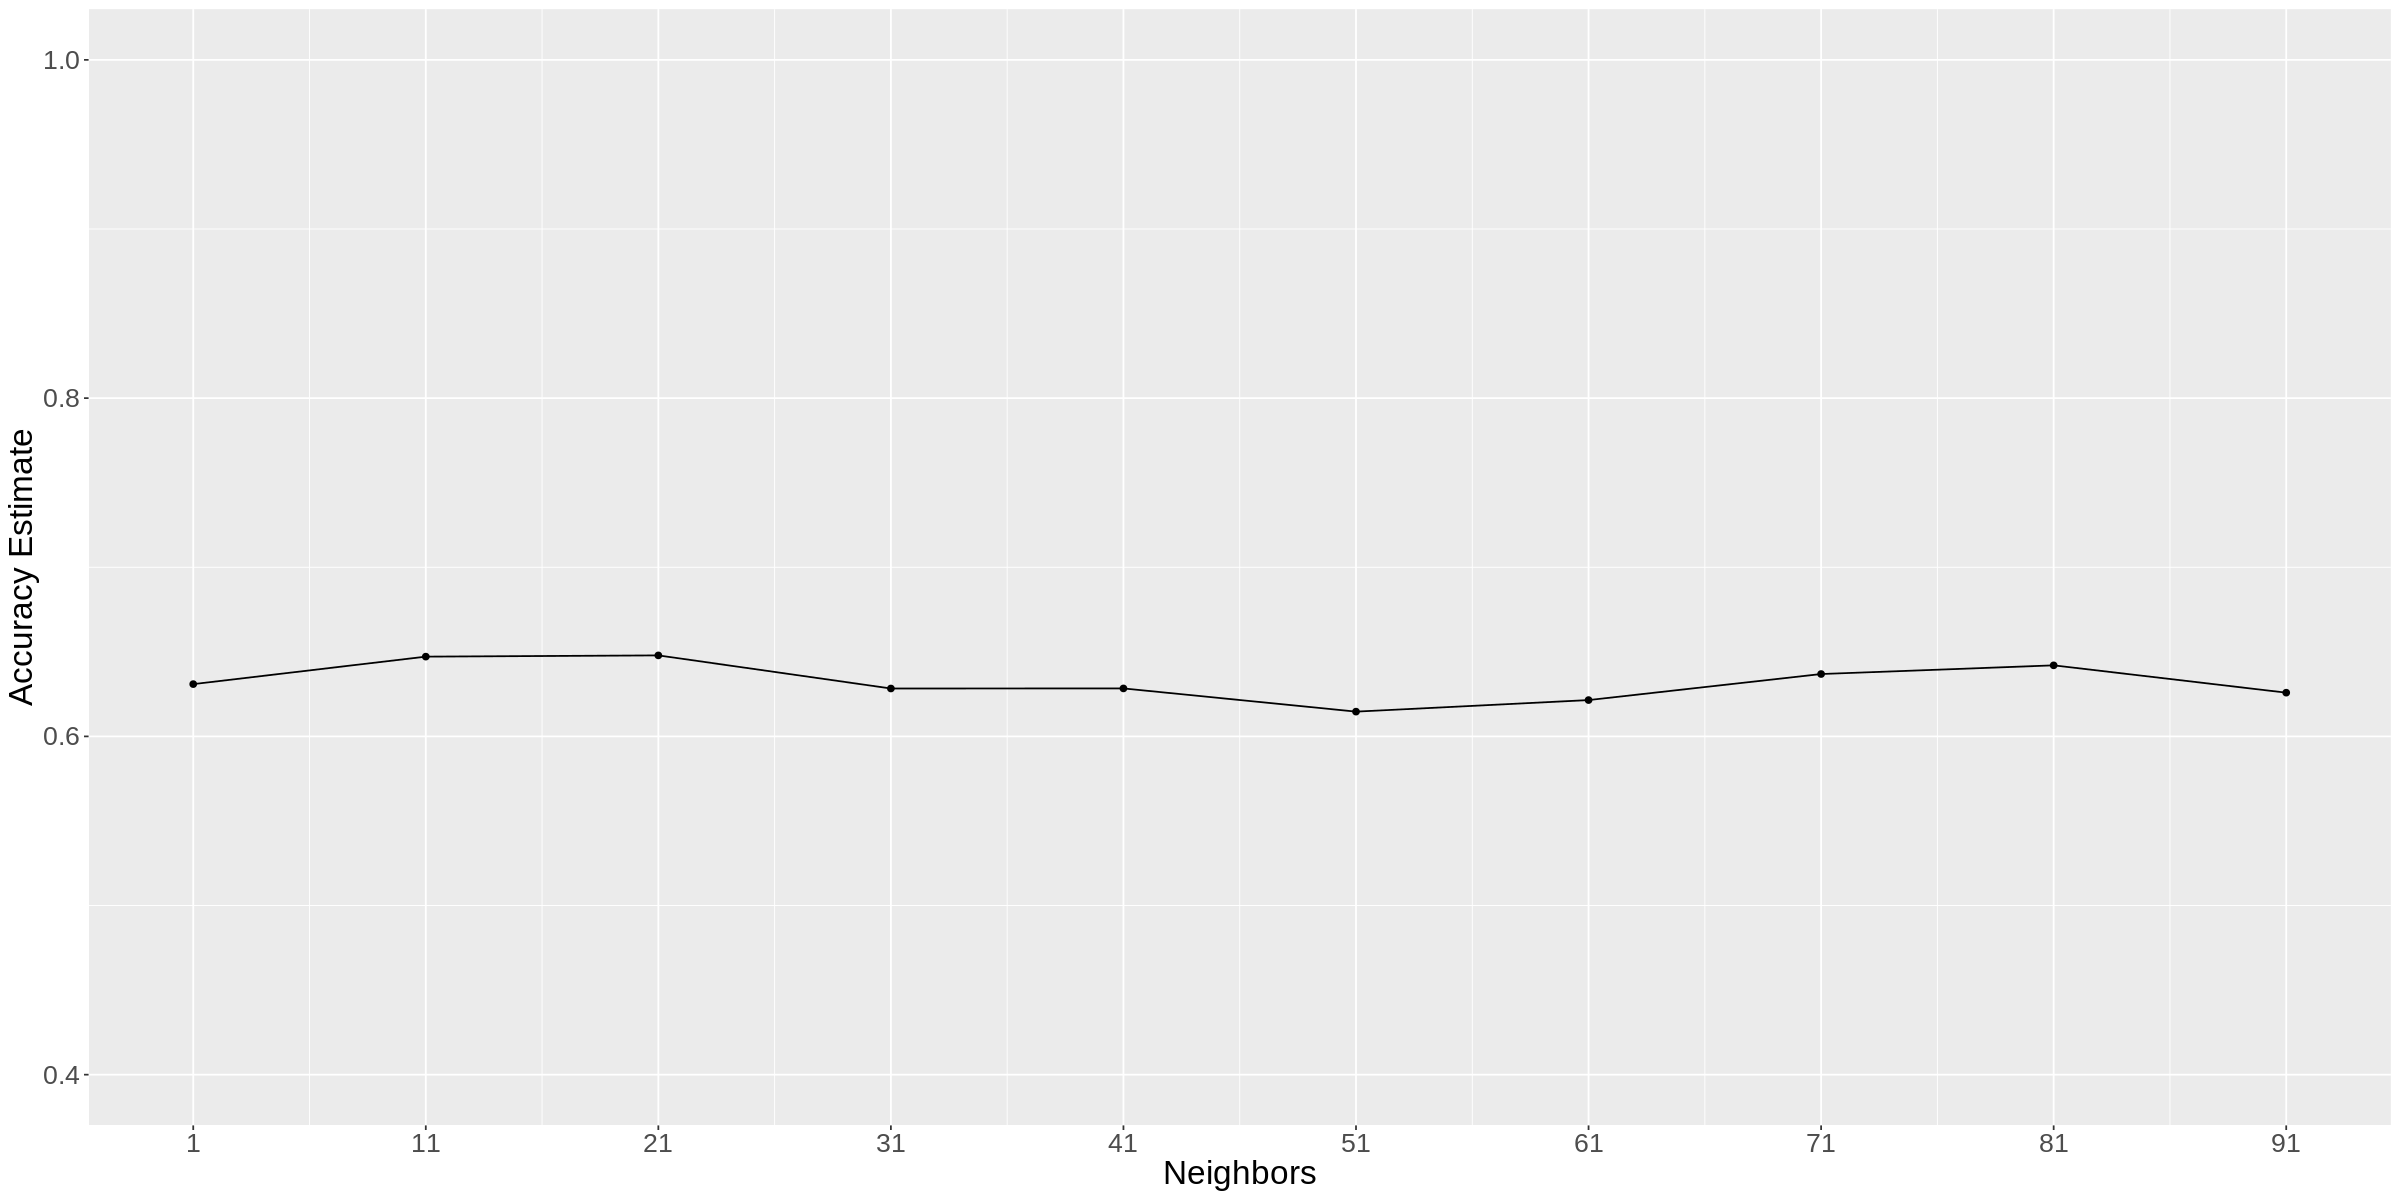

In [23]:
water_accuracy_plot <- ggplot(water_fit, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(1, 100, by=10)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) + # adjusting the y-axis
      theme(text = element_text(size = 20))

water_accuracy_plot

In [25]:
options(repr.matrix.max.rows = 10)
arrange(water_fit, desc(mean)) 

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
21,accuracy,binary,0.6478966,10,0.012993520,Model03
11,accuracy,binary,0.6471657,10,0.011200025,Model02
81,accuracy,binary,0.6420156,10,0.007875105,Model09
71,accuracy,binary,0.6368873,10,0.011781155,Model08
1,accuracy,binary,0.6309190,10,0.014746862,Model01
41,accuracy,binary,0.6283684,10,0.014408585,Model05
31,accuracy,binary,0.6283251,10,0.010158209,Model04
91,accuracy,binary,0.6258559,10,0.011150218,Model10
61,accuracy,binary,0.6214874,10,0.012399584,Model07


From the accuracy plot and table above, we can observe that the best k to choose is 21 since it has the highest accuracy and k values close to it produce similar accuracies. So, we are going to build our final model using k=21.

In [26]:
# create knn model with best k
best_spec <- nearest_neighbor(weight_func="rectangular", neighbors=21) %>% 
            set_engine("kknn") %>% 
            set_mode("classification")

# fit best knn model
best_fit <- workflow() %>% 
            add_recipe(water_recipe) %>% 
            add_model(best_spec) %>% 
            fit(water_train)

# compute accuracy using test data
pred_accuracy <- predict(best_fit, water_test) %>% 
            bind_cols(water_test)%>% 
            metrics(truth=Potability, estimate=.pred_class) %>% 
            filter(.metric=="accuracy")
pred_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6038186


### Sources: 

* Dataset retrived from: https://www.kaggle.com/adityakadiwal/water-potability
* Mekonnen, M. M., & Hoekstra, A. Y. (2016). Four billion people facing severe water scarcity. Science Advances, 2(2).         https://doi.org/10.1126/sciadv.1500323
* United Nations. (n.d.). Water. United Nations. Retrieved February 24, 2022, from https://www.un.org/en/global-issues/water 
* U.-W. (n.d.). About United Nations Water. UN-Water. https://www.unwater.org/about-unwater/
* https://www.worldvision.ca/stories/clean-water/cholera-waterborne-disease-facts#:~:text=Types%20of%20waterborne%20diseases%20include,can%20lead%20to%20severe%20dehydration
* Water in developing countries. (n.d.). GAC. https://www.international.gc.ca/world-monde/issues_development-enjeux_developpement/environmental_protection-protection_environnement/water-eau.aspx?lang=eng
* The Water Project. (n.d.). The Water Crisis: The Importance of Clean Water to Health. https://thewaterproject.org/why-water/health

